In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [9]:
# Load the data
ground_truths_path = 'ground_truths/ground_truths.csv'  # Replace with your local path
predicted_times_path = 'ground_truths/predicted_times.csv'  # Replace with your local path

ground_truths = pd.read_csv(ground_truths_path)
predicted_times = pd.read_csv(predicted_times_path)

# Merge ground truths with predictions based on the image name
comparison = pd.merge(predicted_times, ground_truths, 
                      left_on='Image Name', right_on='Watch', how='inner')


In [10]:
comparison

,Image Name,Predicted Time,Watch,Time
0,watch100_rotated_-270,10:10:00,watch100_rotated_-270,10:10:00
1,watch100_rotated_-90,10:10:00,watch100_rotated_-90,10:10:00
2,watch100_rotated_180,10:10:00,watch100_rotated_180,10:10:00
3,watch10_rotated_-270,10:08:21,watch10_rotated_-270,10:08:21
4,watch10_rotated_-90,10:08:21,watch10_rotated_-90,10:08:21
...,...,...,...,...
398,watch99_rotated_-90,10:10:00,watch99_rotated_-90,10:10:00
399,watch99_rotated_180,10:10:00,watch99_rotated_180,10:10:00
400,watch9_rotated_-270,10:08:40,watch9_rotated_-270,10:09:40
401,watch9_rotated_-90,10:08:00,watch9_rotated_-90,10:09:40


In [13]:
# Convert times to seconds for plotting
def time_to_seconds(time_str):
    """Convert time string (HH:MM:SS) to total seconds."""
    try:
        h, m, s = map(int, time_str.split(':'))
        return h * 3600 + m * 60 + s
    except:
        return None

comparison['Ground Truth Seconds'] = comparison['Time'].apply(time_to_seconds)
comparison['Predicted Seconds'] = comparison['Predicted Time'].apply(time_to_seconds)

# Filter out invalid rows
valid_comparison = comparison.dropna(subset=['Ground Truth Seconds', 'Predicted Seconds'])

# Calculate time differences (absolute value) for each image
valid_comparison['Time Difference (Seconds)'] = (valid_comparison['Predicted Seconds'] - valid_comparison['Ground Truth Seconds']).abs()


C:\Users\pedro\AppData\Local\Temp\ipykernel_4504\916017440.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_comparison['Time Difference (Seconds)'] = (valid_comparison['Predicted Seconds'] - valid_comparison['Ground Truth Seconds']).abs()


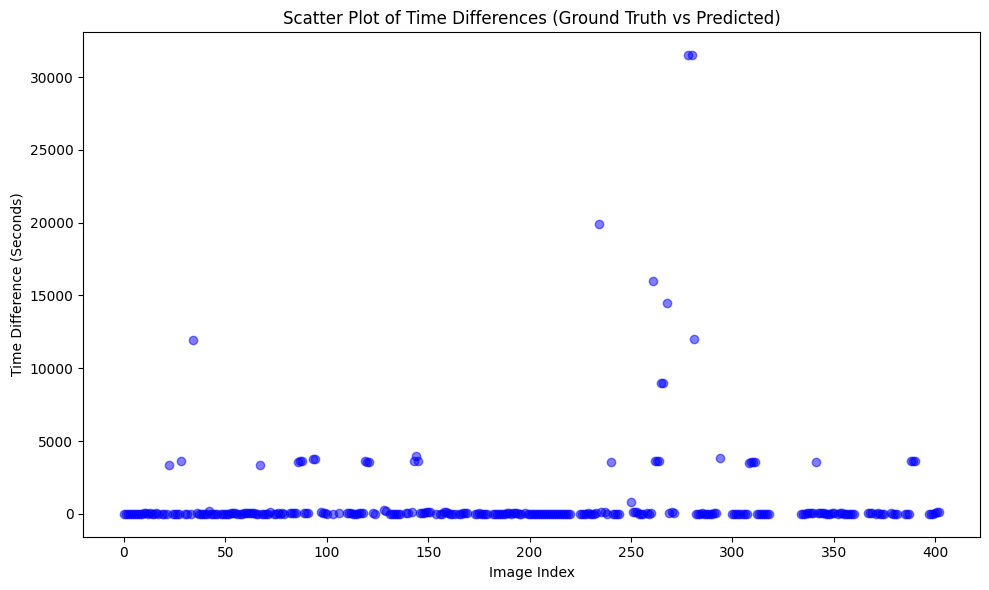

In [14]:
# Plot the time differences
plt.figure(figsize=(10, 6))
plt.scatter(valid_comparison.index, valid_comparison['Time Difference (Seconds)'], color='blue', alpha=0.5)
plt.xlabel('Image Index')
plt.ylabel('Time Difference (Seconds)')
plt.title('Scatter Plot of Time Differences (Ground Truth vs Predicted)')
plt.tight_layout()
plt.show()

Accuracy: 75.49%


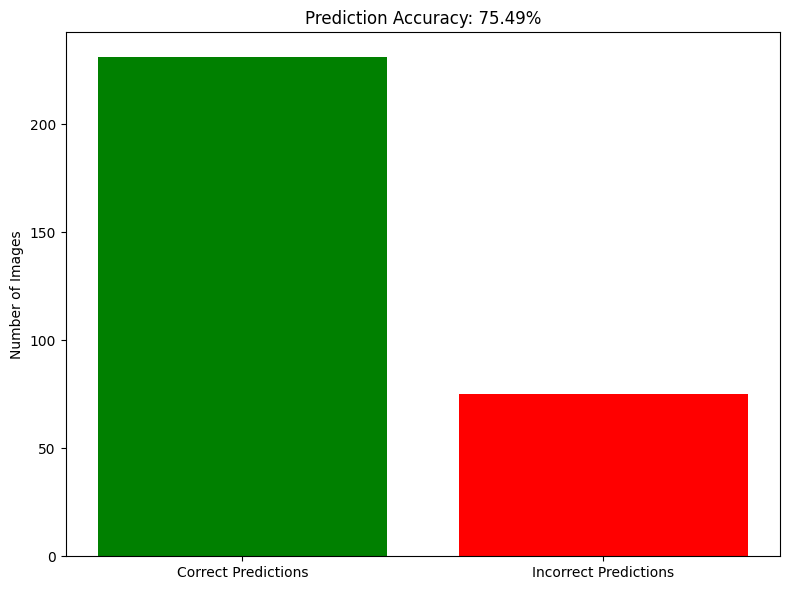

In [17]:
# Define a threshold for correct prediction (e.g., within 60 seconds)
time_threshold = 60  # in seconds

# Calculate the number of correct predictions
correct_predictions = (valid_comparison['Time Difference (Seconds)'] <= time_threshold).sum()

# Calculate the accuracy percentage
total_predictions = len(valid_comparison)
accuracy_percentage = (correct_predictions / total_predictions) * 100

# Output the accuracy percentage
print(f"Accuracy: {accuracy_percentage:.2f}%")

# Optionally, display a bar plot for correct vs incorrect predictions
correct = valid_comparison['Time Difference (Seconds)'] <= time_threshold
incorrect = valid_comparison['Time Difference (Seconds)'] > time_threshold

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(['Correct Predictions', 'Incorrect Predictions'], [correct.sum(), incorrect.sum()], color=['green', 'red'])
plt.title(f'Prediction Accuracy: {accuracy_percentage:.2f}%')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

# Standard Deviation 

In [18]:
# Calculate the standard deviation of the time differences
std_dev = valid_comparison['Time Difference (Seconds)'].std()
print(f"Standard Deviation of Time Differences: {std_dev:.2f} seconds")

Standard Deviation of Time Differences: 3349.99 seconds


Very high due to some outliers.

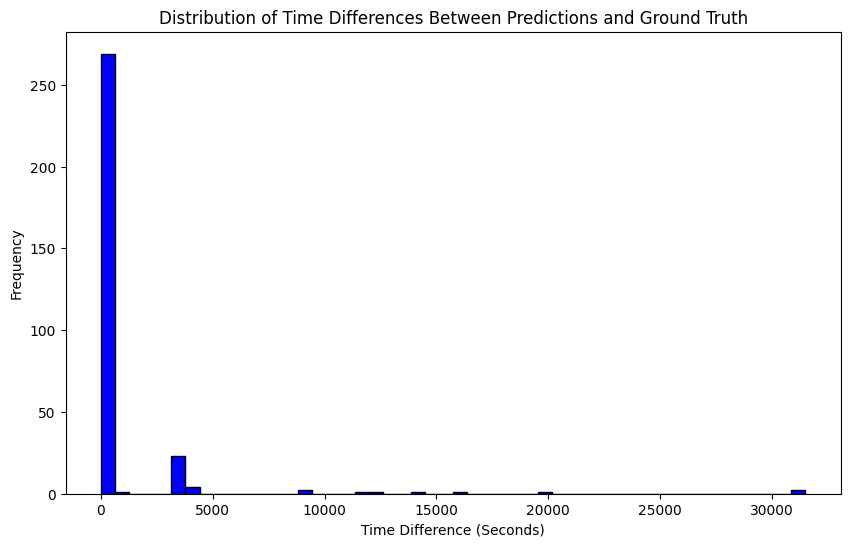

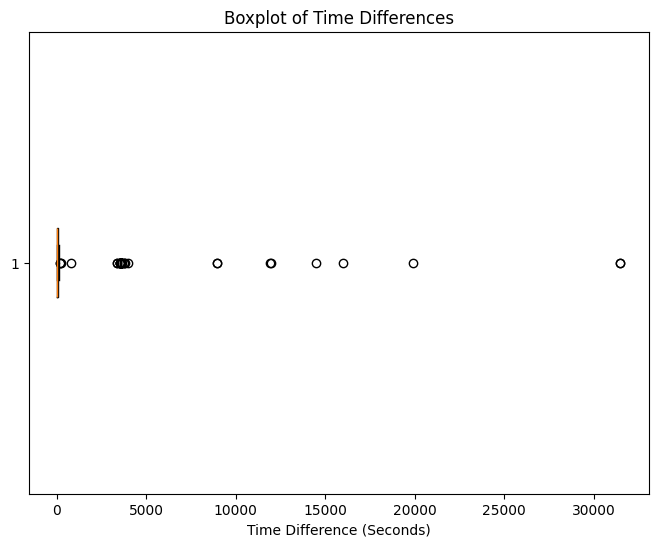

In [19]:
import matplotlib.pyplot as plt

# Plot histogram of time differences
plt.figure(figsize=(10, 6))
plt.hist(valid_comparison['Time Difference (Seconds)'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Time Differences Between Predictions and Ground Truth')
plt.xlabel('Time Difference (Seconds)')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot to see outliers
plt.figure(figsize=(8, 6))
plt.boxplot(valid_comparison['Time Difference (Seconds)'], vert=False)
plt.title('Boxplot of Time Differences')
plt.xlabel('Time Difference (Seconds)')
plt.show()


In [ ]:
# Define an outlier threshold (1 hour = 3600 seconds)
outlier_threshold = 3600  # seconds

# Filter out time differences that are above the threshold
filtered_comparison = valid_comparison[valid_comparison['Time Difference (Seconds)'].abs() <= outlier_threshold]

# Recalculate the standard deviation without outliers
filtered_std_dev = filtered_comparison['Time Difference (Seconds)'].std()
print(f"Standard Deviation without Outliers: {filtered_std_dev} seconds")


Standard Deviation without Outliers: 897.1573918779343 seconds


# Mean Absolute Error

In [ ]:
import numpy as np

def mean_absolute_error_with_threshold(y_true, y_pred, threshold=None):

    # Calculate the absolute errors
    errors = np.abs(y_true - y_pred)
    
    # Apply threshold to filter out outliers if provided
    if threshold is not None:
        errors = errors[errors <= threshold]
    
    # Return the mean of the errors
    return np.mean(errors)

threshold_value = 3600  # 1 hour in seconds
mae_with_threshold = mean_absolute_error_with_threshold(valid_comparison['Ground Truth Seconds'], valid_comparison['Predicted Seconds'], threshold=threshold_value)
print(f"Mean Absolute Error (MAE) with threshold: {mae_with_threshold} seconds")


Mean Absolute Error (MAE) with threshold: 271.29655172413794 seconds
